#### Sage peptide level

In [ ]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
library(stringr)
fs <- list.files(path = "./sage_repeat_runs/", pattern = "UP000005640_9606_entrapment_pep.*.txt", full.names = TRUE, include.dirs = TRUE)
cat("current working directory: ", getwd(), "\n")
print(fs)

for(pep_file in fs){
    fname <- str_replace_all(basename(pep_file),".txt","")
    report_file <- paste("./sage_repeat_runs/",fname,"/results.sage.tsv",sep="")
    cat("pep_file: ", pep_file, "\n")
    cat("report_file: ", report_file, "\n")
    pro_fdp_file <- run_sage_fdp_analysis(report_file,level = "peptide",prefix = "sage-peptide",pep_file = pep_file,k_fold=1)
}

current working directory:  /data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/revision1/PXD001468 
 [1] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3000.txt"
 [2] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3001.txt"
 [3] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3002.txt"
 [4] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3003.txt"
 [5] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3004.txt"
 [6] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3005.txt"
 [7] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3006.txt"
 [8] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3007.txt"
 [9] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3008.txt"
[10] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3009.txt"
pep_file:  ./sage_repeat_runs//UP000005640_9606_entrapment_pep3000.txt 
report_file:  ./sage_repeat_runs/UP000005640_9606_entrapment_pep3000/results.sage.tsv 


In [ ]:
get_fdp_data = function(fdp_file){
    a <- read_csv(fdp_file)
    q_cutoff <- seq(0.01,0.1,0.01)
    print(q_cutoff)

    res <- lapply(q_cutoff,function(x){
        cat("",x,"\n")
        y <- a %>% filter(q_value <= x) %>% arrange(desc(q_value),desc(FDP),desc(FDP_1B )) %>% head(1) %>% mutate(q_cutoff = x) %>% as_tibble
        return(y)
    }) %>% bind_rows
    fname <- dirname(fdp_file) %>% basename
    fres <- res %>% select(q_cutoff,q_value,FDP,FDP_1B) %>% mutate(replicate = fname)
    return(fres)
}

fdp_files <- list.files(path = "./sage_repeat_runs/", pattern = "sage-peptide-sage_fdp_peptide.csv", full.names = TRUE, include.dirs = TRUE, recursive = TRUE)
lapply(fdp_files,get_fdp_data) %>% bind_rows %>% write_csv("./sage_repeat_runs/sage-peptide-fdp.csv")

Rows: 267871 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 268253 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 268043 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 268344 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 267466 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 268058 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 267477 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 267711 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 267950 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 267624 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): peptide, protein, mod_peptide
dbl (10): q_value, PEP, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


In [ ]:
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(DBI)
library(ggplot2)
library(ggpubr)
library(tidyr)
library(readr)
library(dplyr)
library(stringr)

color_mapping <- c("Paired entrapment" = "blue", "Sample entrapment" = "red", "Lower bound" = "green", "Combined entrapment" = "purple")

plot_fdp_fdr_ci=function(dat,fdr_max=NULL,fig_title=NULL,scale_xy=TRUE,add_numbers=FALSE,r=1,fixed_fdr_max=FALSE,max_x=NA,max_y=NA,x_lab=NA,y_lab=NA,color_mapping=NULL,line_alpha=1) {
    max_fdp <- max(c(dat$FDP,dat$q_value))
    if("ci_lower" %in% colnames(dat) && "ci_upper" %in% colnames(dat)){
        max_fdp <- max(c(dat$ci_upper,dat$ci_lower,max_fdp))
    }
    if(!is.null(fdr_max)){
        if(fixed_fdr_max){
            max_fdp <- fdr_max
        }else{
            max_fdp <- min(c(fdr_max,max_fdp))
        }
    }
    print(color_mapping)

    gg1 <- ggplot(dat,aes(x=q_value,y=FDP,color=Method)) + 
            geom_abline(slope = 1,intercept = 0,color="gray")+
            #rasterise(geom_line(), dpi = 300) + 
            geom_line(alpha=line_alpha)+
            scale_color_manual(values = color_mapping) +
            xlab(x_lab)+
            ylab(y_lab)+
            theme_bw()+
            #geom_segment(x=0.01,xend=0.01,y=0,yend=0.01,linewidth=0.3,color="blue",linetype=2)+
            theme_pubr(base_size = 12,border = TRUE)

    if("ci_lower" %in% colnames(dat) && "ci_upper" %in% colnames(dat)){
        gg1 <- gg1 + geom_ribbon(aes(ymin=ci_lower,ymax=ci_upper,fill=Method),alpha=0.4,color=NA,show.legend = FALSE)+
            scale_fill_manual(values = color_mapping) ## this is critical to make the fill color consistent with the line color
        
    }

    if(scale_xy){

        if(!is.na(max_x) || !is.na(max_y)){
             #gg1 <- gg1 + geom_vline(xintercept = 0.01,linetype=2,color="blue")
            if(!is.na(max_x)){
                gg1 <- gg1 + xlim(0,max_x) + scale_x_continuous(labels = scales::percent,limits =c(0,max_x))
            }else{
                gg1 <- gg1 + xlim(0,max_fdp)+ scale_x_continuous(labels = scales::percent,limits =c(0,max_fdp))
            }
            if(!is.na(max_y)){
                gg1 <- gg1 + ylim(0,max_y) + scale_y_continuous(labels = scales::percent,limits =c(0,max_y))
            }else{
                gg1 <- gg1 + ylim(0,max_fdp) + scale_y_continuous(labels = scales::percent,limits =c(0,max_fdp))
            }
        }else{
            gg1 <- gg1 + #geom_vline(xintercept = 0.01,linetype=2,color="blue")+
                xlim(0,max_fdp)+
                ylim(0,max_fdp)+
                scale_y_continuous(labels = scales::percent,limits =c(0,max_fdp))+
                #scale_y_pct()+
                #scale_x_pct()+
                scale_x_continuous(labels = scales::percent,limits =c(0,max_fdp))
        }
    }
    #theme(legend.position = "top",plot.margin = unit(2*c(0.1, 0.1, 0.1, 0.1),"inches"))+    
    ## legend on the botton right
    ## no background color for the legend
    gg1 <- gg1 + guides(fill = guide_legend(byrow = TRUE)) +
                 theme(legend.position = c(0.3, 0.80),plot.margin = unit(2*c(0.1, 0.1, 0.1, 0.1),"inches"),legend.background = element_blank(),
                       legend.spacing.y = unit(0, "lines"),
                       legend.margin=margin(0,0,0,0))
            
    if(!is.null(fig_title)){
        gg1 <- gg1 + ggtitle(fig_title)
    }

    if(add_numbers){
        # add numbers on the top left size of the figure using annotation, text align to left
        # y <- dat %>% filter(q_value<=0.01) %>% group_by(Method) %>% summarise(FDP001=max(FDP)) %>% mutate(ratio=sprintf("%.4f%%",FDP001*100))
        y <- dat %>% filter(q_value<=0.01) %>% group_by(Method) %>% arrange(desc(q_value)) %>% filter(row_number()==1) %>% summarise(FDP001=max(FDP)) %>% mutate(ratio=sprintf("%.4f%%",FDP001*100))
        #n_t <- 
        if(abs(max_fdp-0.01)<=0.02){
            # text right align
            gg1 <- gg1 + annotate("text", x = max_fdp*0.1, y = 0.9*max_fdp, label = paste("Total discoveries:",nrow(x %>% filter(q_value<=0.01)),"\n",paste(y$Method,y$ratio,sep=":",collapse = "\n"),sep=""), color = "black", size = 3,hjust = 0)
        }else{
            gg1 <- gg1 + annotate("text", x = 0.01, y = 0.9*max_fdp, label = paste("Total discoveries:",nrow(x %>% filter(q_value<=0.01)),"\n",paste(y$Method,y$ratio,sep=":",collapse = "\n"),sep=""), color = "black", size = 3,hjust = 0)
        }
    }
   
    # library(ggpubr)
    # options(repr.plot.width = 12, repr.plot.height = 6)
    # gg <- ggarrange(gg1,gg2,ncol = 2,  common.legend = TRUE)
    # options(jupyter.plot_mimetypes = "image/png")
    return(gg1)

    #pdf("fdp_fdr_lib_qvalue_protein.pdf",width = 8,height = 4)
    #print(gg)
    #dev.off()
}


Rows: 100 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): replicate
dbl (4): q_cutoff, q_value, FDP, FDP_1B

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 5
  q_cutoff q_value    FDP FDP_1B replicate                          
     <dbl>   <dbl>  <dbl>  <dbl> <chr>                              
1     0.01  0.0100 0.0116 0.0106 UP000005640_9606_entrapment_pep3000
2     0.02  0.0200 0.0225 0.0205 UP000005640_9606_entrapment_pep3000
3     0.03  0.0300 0.0344 0.0315 UP000005640_9606_entrapment_pep3000
4     0.04  0.0400 0.0462 0.0424 UP000005640_9606_entrapment_pep3000
5     0.05  0.0500 0.0580 0.0535 UP000005640_9606_entrapment_pep3000
6     0.06  0.0600 0.0689 0.0637 UP000005640_9606_entrapment_pep3000
# A tibble: 6 × 5
  FDR_threshold q_value replicate                           method est_FDP
          <dbl>   <dbl> <chr>                               <chr>    <dbl>
1          0.01  0.0100 UP000005640_9606_entrapment_pep3000 FDP     0.0116
2          0.02  0.0200 UP000005640_9606_entrapment_pep3000 FDP     0.0225
3          0.03  0.0300 UP000005640_9606_entrapment_pep3000 FDP     0.0344
4          0.04  0.0400 UP000005640_9

`summarise()` has grouped output by 'FDR_threshold'. You can override using the
`.groups` argument.



   FDP FDP_1B  lower 
    10     10     10 

  Paired method     Lower bound Combined method 
      "#7CAE00"       "#00BFC4"       "#F8766D" 


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”


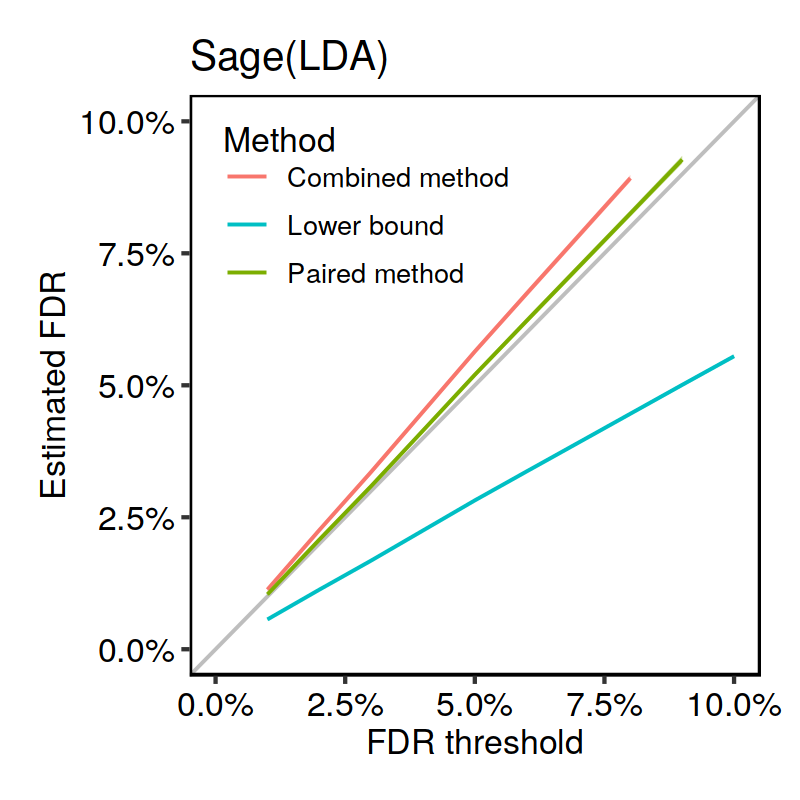

In [ ]:
fdp_file <- "./sage_repeat_runs/sage-peptide-fdp.csv"
color_mapping <- c("Paired method" = "#7CAE00", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")

x <- read_csv(fdp_file) 
head(x) %>% print

dat <- x %>% mutate(lower=FDP/2) %>% gather(key = "method", value = "est_FDP", -q_value,-q_cutoff,-replicate) %>% rename(FDR_threshold=q_cutoff)
print(head(dat))

x <- dat
x <- x %>% group_by(FDR_threshold,method) %>% summarise(FDP=mean(est_FDP),ci_lower=FDP-1.96*sd(est_FDP)/sqrt(n()),ci_upper=FDP+1.96*sd(est_FDP)/sqrt(n()))
x <- x %>% rename(Method=method,q_value=FDR_threshold)
table(x$Method)
x$Method[x$Method=="FDP"] <- "Combined method"
x$Method[x$Method=="FDP_1B"] <- "Paired method"
x$Method[x$Method=="lower"] <- "Lower bound"

dat <- x
#print(dat %>% as.data.frame)
gg1 <- plot_fdp_fdr_ci(dat,x_lab="FDR threshold",y_lab="Estimated FDR",color_mapping = color_mapping,fig_title = "Sage(LDA)",fdr_max = 0.1)

options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
print(gg1)


#### Tide analysis

In [6]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
library(stringr)
fs <- list.files(path = "./sage_repeat_runs/", pattern = "UP000005640_9606_entrapment_pep.*.txt", full.names = TRUE, include.dirs = TRUE)
cat("current working directory: ", getwd(), "\n")
print(fs)

for(pep_file in fs){
    fname <- str_replace_all(basename(pep_file),".txt","") %>% str_replace_all(".*UP000005640_9606_entrapment_pep","")
    report_file <- paste("tide_repeat_runs/Bo_share_entrapment_results/pair_single_",fname,".peptides.txt",sep="")
    cat("pep_file: ", pep_file, "\n")
    cat("report_file: ", report_file, "\n")
    pro_fdp_file1 <- run_percolator_reset_fdp_analysis(report_file,level = "peptide",prefix = paste("tide-peptide",fname,sep=""),pep_file = pep_file,k_fold=1)
    #gg1 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="Tide+Percolator-RESET",add_numbers = TRUE, color_mapping=color_mapping,legend_position=c(0.5,0.5),fdr_decimal_place = 2)
}

current working directory:  /data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/revision1/PXD001468 
 [1] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3000.txt"
 [2] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3001.txt"
 [3] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3002.txt"
 [4] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3003.txt"
 [5] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3004.txt"
 [6] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3005.txt"
 [7] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3006.txt"
 [8] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3007.txt"
 [9] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3008.txt"
[10] "./sage_repeat_runs//UP000005640_9606_entrapment_pep3009.txt"


pep_file:  ./sage_repeat_runs//UP000005640_9606_entrapment_pep3000.txt 
report_file:  tide_repeat_runs/Bo_share_entrapment_results/pair_single_3000.peptides.txt 


In [ ]:
get_fdp_data = function(fdp_file){
    a <- read_csv(fdp_file)
    q_cutoff <- seq(0.01,0.1,0.01)
    print(q_cutoff)

    res <- lapply(q_cutoff,function(x){
        cat("",x,"\n")
        y <- a %>% filter(q_value <= x) %>% arrange(desc(q_value),desc(FDP),desc(FDP_1B )) %>% head(1) %>% mutate(q_cutoff = x) %>% as_tibble
        return(y)
    }) %>% bind_rows
    fname <- dirname(fdp_file) %>% basename
    fres <- res %>% select(q_cutoff,q_value,FDP,FDP_1B) %>% mutate(replicate = fname)
    return(fres)
}

fdp_files <- list.files(path = "./tide_repeat_runs/", pattern = "tide-peptide.*-percolator_fdp_peptide.csv", full.names = TRUE, include.dirs = TRUE, recursive = TRUE)
lapply(fdp_files,get_fdp_data) %>% bind_rows %>% write_csv("./tide_repeat_runs/tide-peptide-fdp.csv")

Rows: 120690 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 120998 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 121389 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 121100 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 120651 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 121141 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 120586 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 120913 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 120780 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 121022 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): peptide, protein, mod_peptide
dbl (9): q_value, score, FDP, n_t, n_p, FDP_1B, n_p_t_s, n_p_s_t, vt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.1 


Rows: 100 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): replicate
dbl (4): q_cutoff, q_value, FDP, FDP_1B

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 5
  q_cutoff q_value    FDP FDP_1B replicate                  
     <dbl>   <dbl>  <dbl>  <dbl> <chr>                      
1     0.01 0.00998 0.0111 0.0104 Bo_share_entrapment_results
2     0.02 0.0200  0.0212 0.0198 Bo_share_entrapment_results
3     0.03 0.0300  0.0320 0.0298 Bo_share_entrapment_results
4     0.04 0.0400  0.0422 0.0394 Bo_share_entrapment_results
5     0.05 0.0500  0.0527 0.0492 Bo_share_entrapment_results
6     0.06 0.0600  0.0637 0.0594 Bo_share_entrapment_results
# A tibble: 6 × 5
  FDR_threshold q_value replicate                   method est_FDP
          <dbl>   <dbl> <chr>                       <chr>    <dbl>
1          0.01 0.00998 Bo_share_entrapment_results FDP     0.0111
2          0.02 0.0200  Bo_share_entrapment_results FDP     0.0212
3          0.03 0.0300  Bo_share_entrapment_results FDP     0.0320
4          0.04 0.0400  Bo_share_entrapment_results FDP     0.0422
5          0.05 0.0500  Bo_share_entrapment_results FDP     0.0527
6      

`summarise()` has grouped output by 'FDR_threshold'. You can override using the
`.groups` argument.



   FDP FDP_1B  lower 
    10     10     10 

  Paired method     Lower bound Combined method 
      "#7CAE00"       "#00BFC4"       "#F8766D" 


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


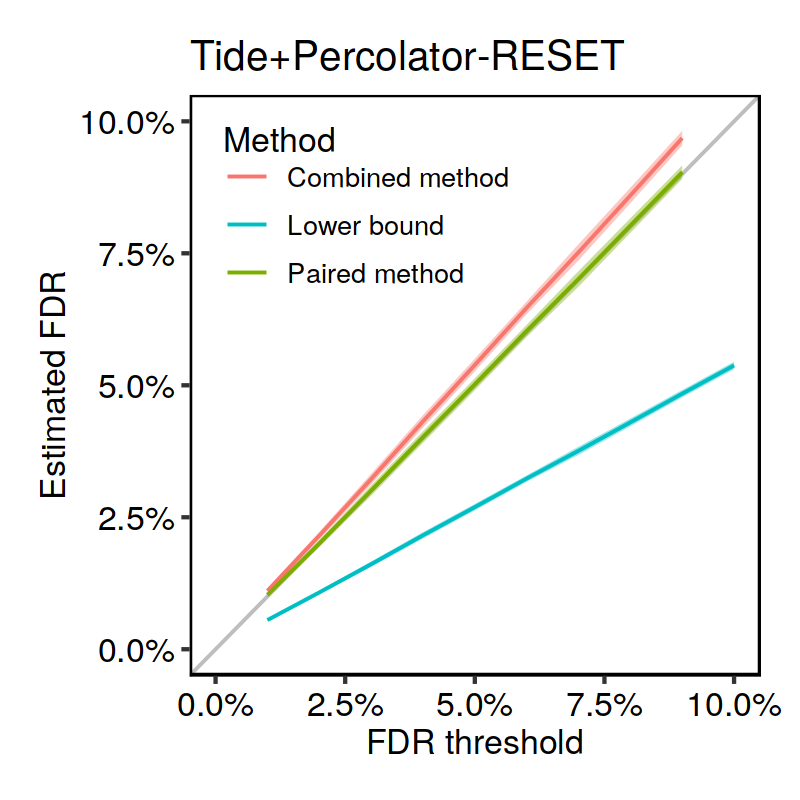

In [ ]:
fdp_file <- "./tide_repeat_runs/tide-peptide-fdp.csv"
color_mapping <- c("Paired method" = "#7CAE00", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")

x <- read_csv(fdp_file) 
head(x) %>% print

dat <- x %>% mutate(lower=FDP/2) %>% gather(key = "method", value = "est_FDP", -q_value,-q_cutoff,-replicate) %>% rename(FDR_threshold=q_cutoff)
print(head(dat))

x <- dat
x <- x %>% group_by(FDR_threshold,method) %>% summarise(FDP=mean(est_FDP),ci_lower=FDP-1.96*sd(est_FDP)/sqrt(n()),ci_upper=FDP+1.96*sd(est_FDP)/sqrt(n()))
x <- x %>% rename(Method=method,q_value=FDR_threshold)
table(x$Method)
x$Method[x$Method=="FDP"] <- "Combined method"
x$Method[x$Method=="FDP_1B"] <- "Paired method"
x$Method[x$Method=="lower"] <- "Lower bound"

dat <- x
#print(dat %>% as.data.frame)
gg2 <- plot_fdp_fdr_ci(dat,x_lab="FDR threshold",y_lab="Estimated FDR",color_mapping = color_mapping,fig_title = "Tide+Percolator-RESET",fdr_max = 0.1)

options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
print(gg2)


Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


png 
  2

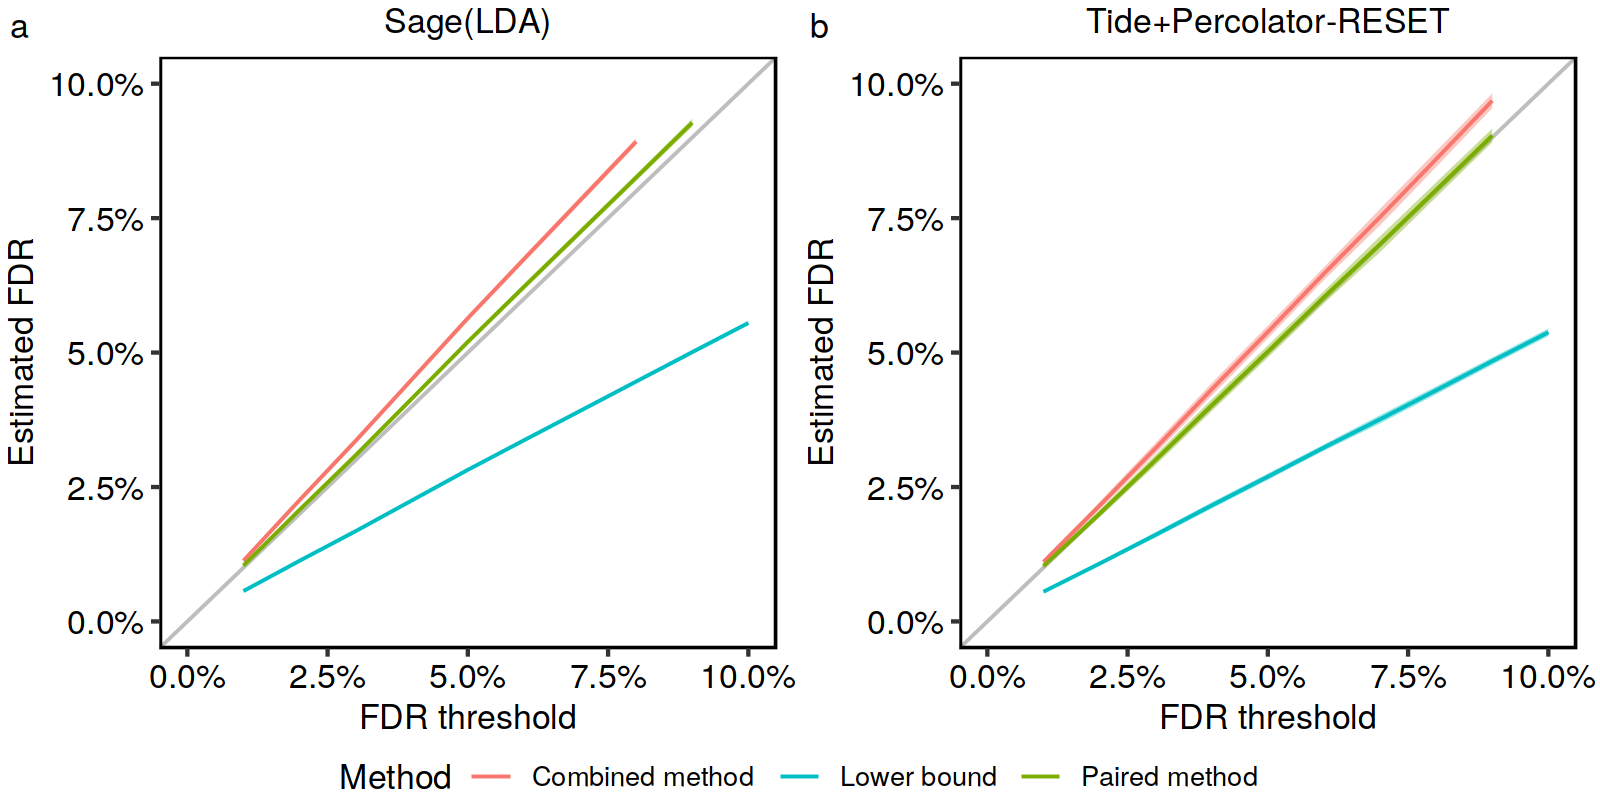

In [23]:
options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4*2, repr.plot.height = 4, repr.plot.res = 200)
library(cowplot)
#legend <- as_ggplot(get_legend(gg1))+theme(legend.position = c(0.5, 0.5))
gg <- ggarrange(gg1+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                gg2+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                #gg3+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                #gg5+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                legend = "bottom", common.legend=TRUE, ncol = 2, nrow = 1, align = "hv",
                labels = c("a", "b"), font.label = list(size = 12, color = "black", face = "plain"))
print(gg)

pdf("FigureS-sage-tide-CI.pdf",width = 3.5*2,height = 3.5) 
print(gg)
dev.off()